Submitted by: Francine Ysabelle Borromeo

In [12]:
import pandas as pd

# Define the file path
file_path = "C:/Users/FREDDIE/Downloads/perfume+data/perfume_data.xlsx"

try:
    # Load the dataset
    perfume_data = pd.read_excel(file_path)
    # Display the first few rows of the dataset to understand its structure
    print(perfume_data.head())
except FileNotFoundError:
    print("File not found. Please double-check the file path.")
except Exception as e:
    print("An error occurred:", e)





      ajayeb  64558  64556  64543  64543.1  64541  64543.2  64543.3  64541.1  \
0      ajmal  60502  60489  61485    60487  61485    61513    60515    60500   
1     amreaj  57040  57040  57040    58041  58041    58041    58041    57042   
2       aood  71083  72087  71091    71095  71099    72103    71099    72099   
3  asgar_ali  68209  68209  68216    68216  68223    68223    68223    68223   
4    bukhoor  71046  71046  71046    71046  71046    71046    71046    71046   

   64541.2  ...  64541.8  64541.9  64541.10  64541.11  64541.12  64541.13  \
0    60500  ...    60472    60472     60461     61470     60487     60487   
1    57042  ...    58041    58041     58041     58041     58041     58041   
2    72099  ...    72095    71095     71095     72103     71103     71103   
3    68230  ...    68230    67224     67217     67217     68223     68223   
4    71046  ...    70049    70049     70049     70048     70049     70048   

   64528.2  64528.3  64528.4  64528.5  
0    61485    60

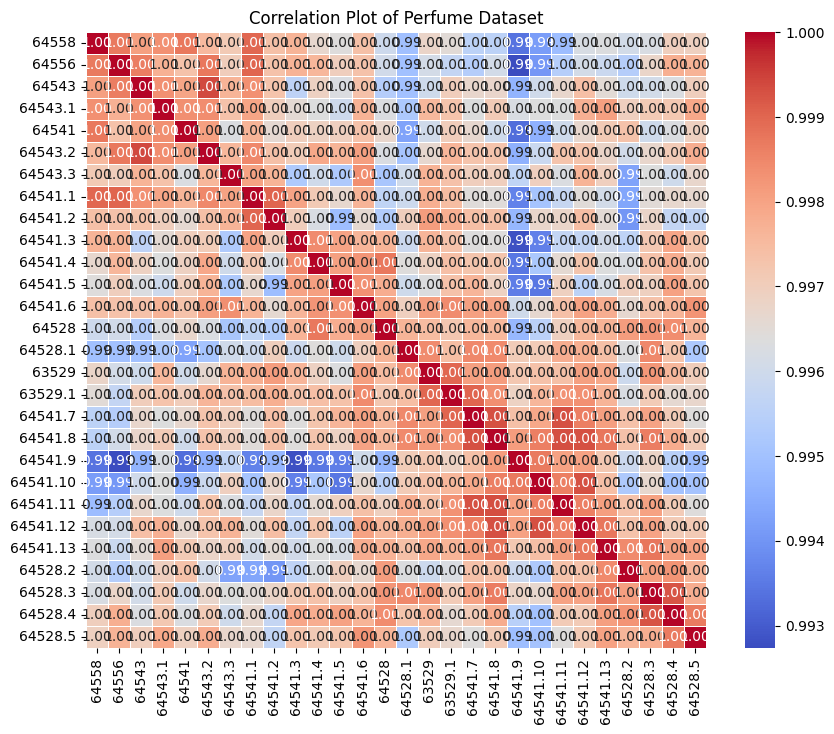

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = "C:/Users/FREDDIE/Downloads/perfume+data/perfume_data.xlsx"
perfume_data = pd.read_excel(file_path)

# Exclude non-numeric columns
numeric_columns = perfume_data.select_dtypes(include=['number'])

# Compute the correlation matrix
correlation_matrix = numeric_columns.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Add a title
plt.title("Correlation Plot of Perfume Dataset")

# Show the plot
plt.show()




2. Check the distribution of each column and determine which probability distribution it fits.

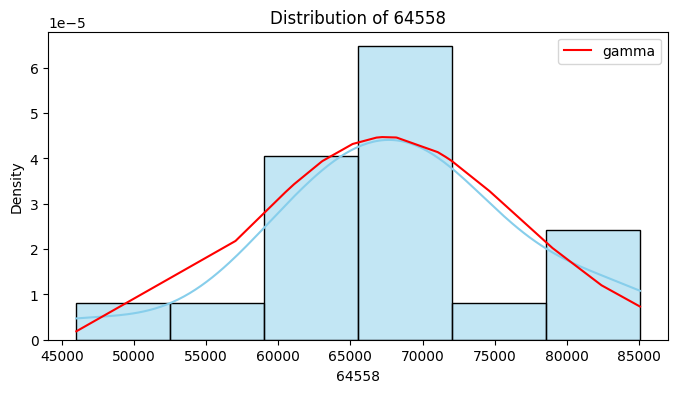

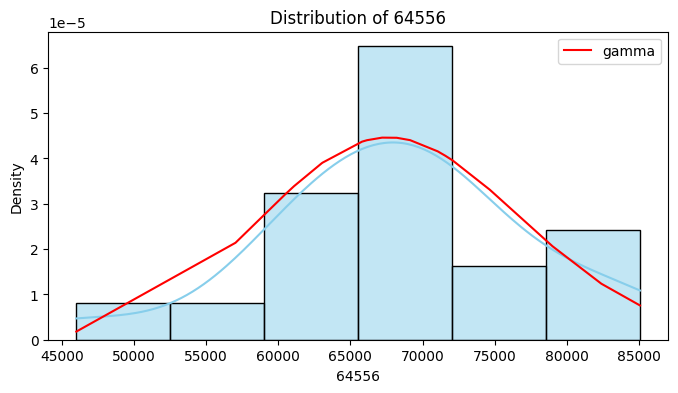

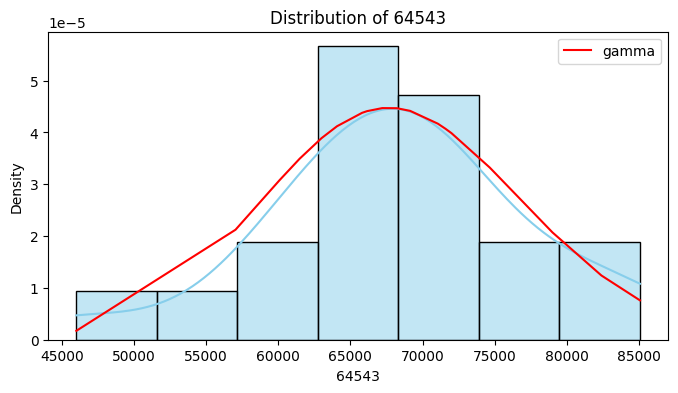

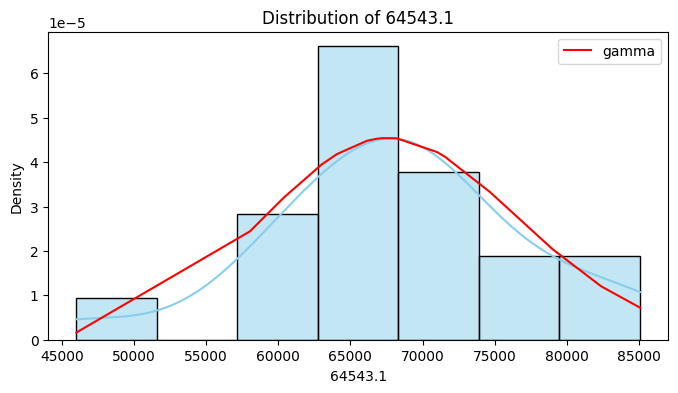

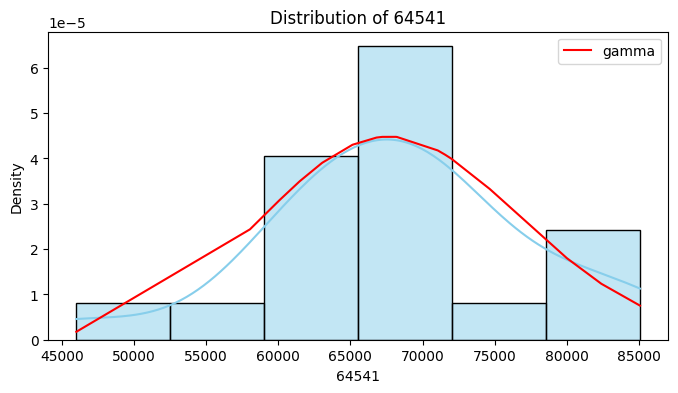

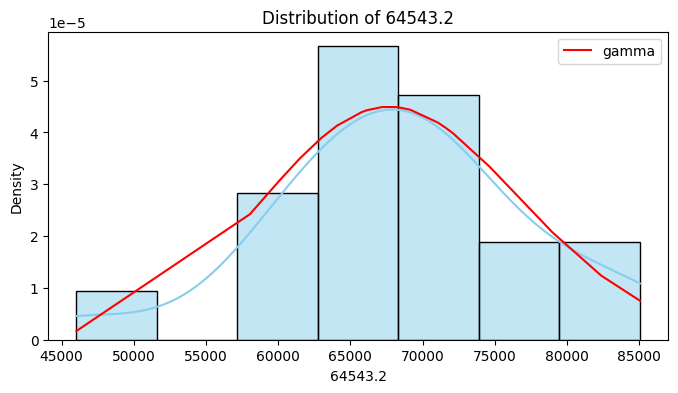

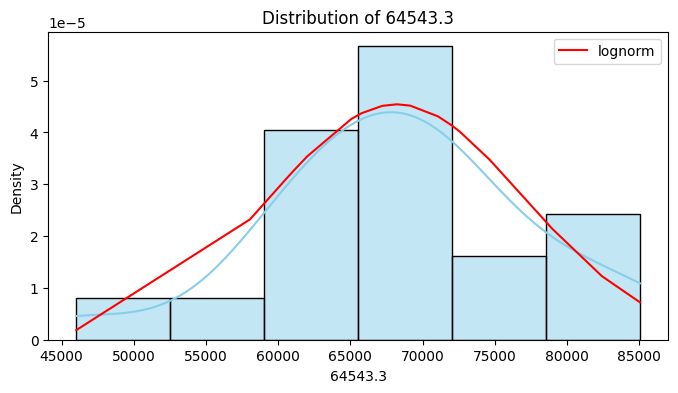

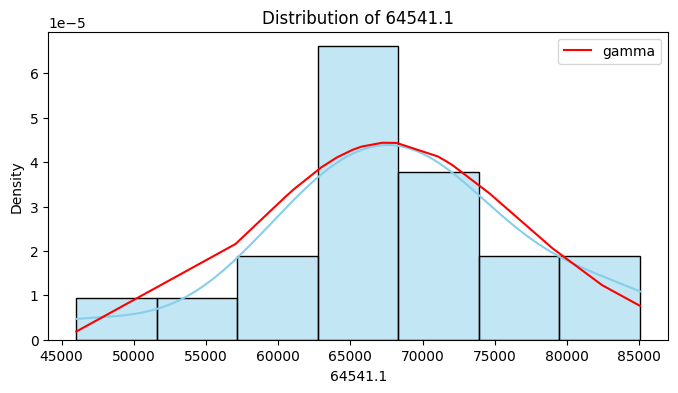

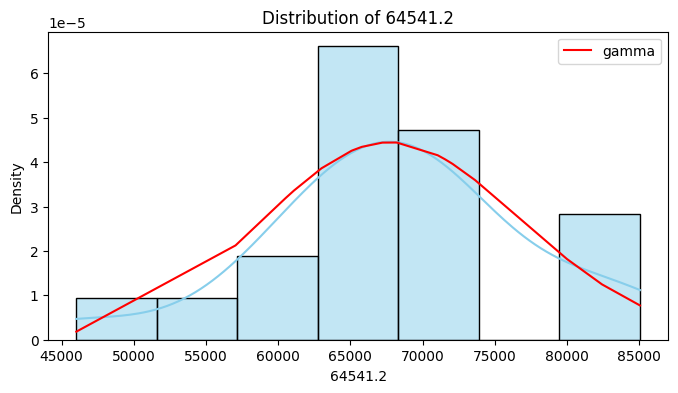

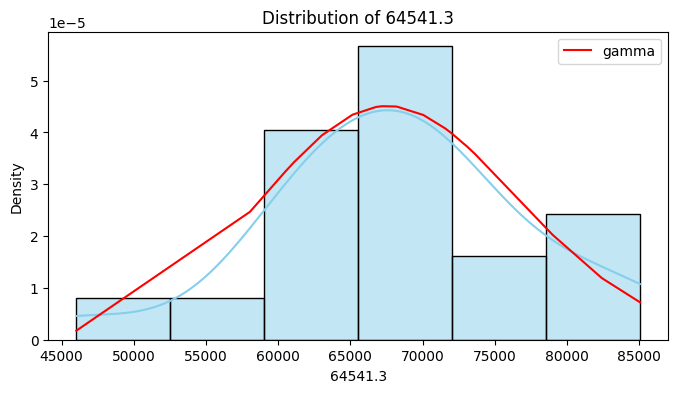

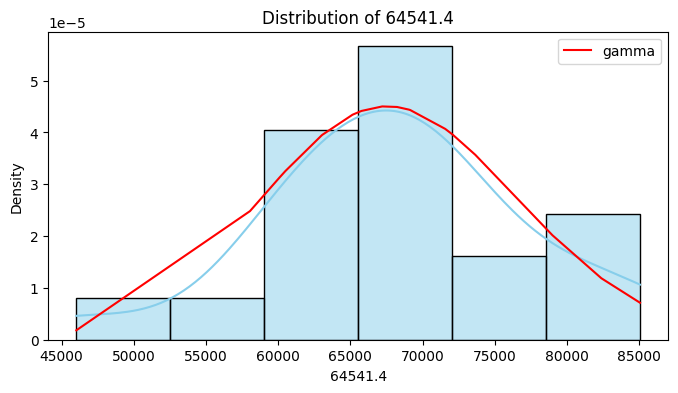

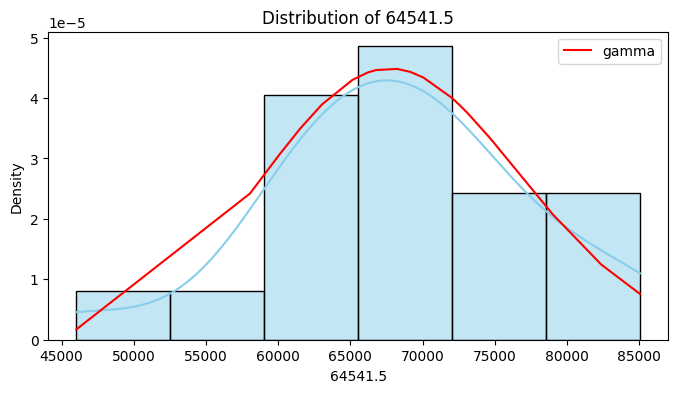

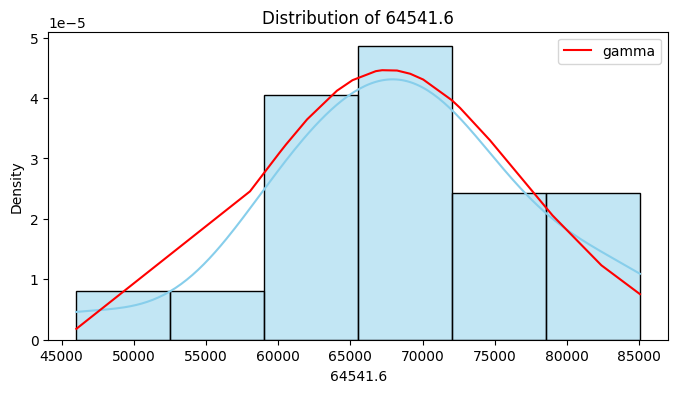

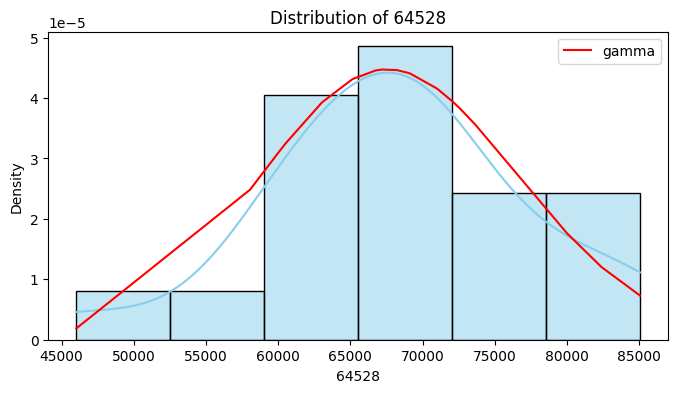

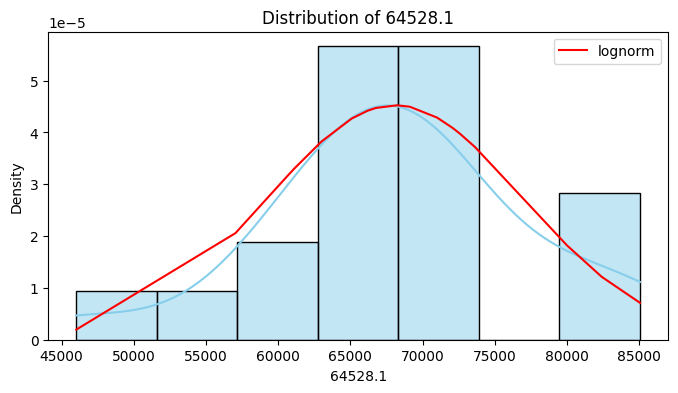

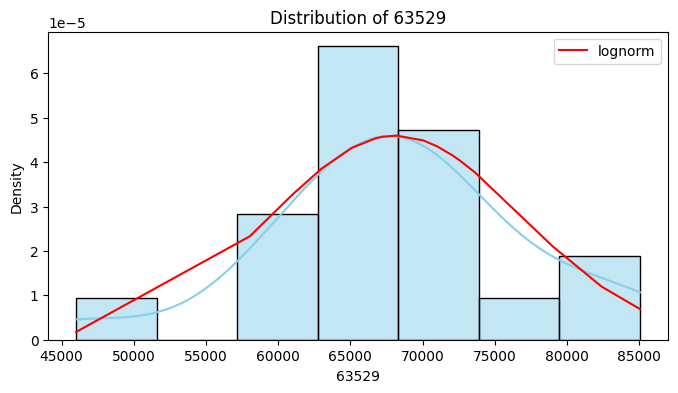

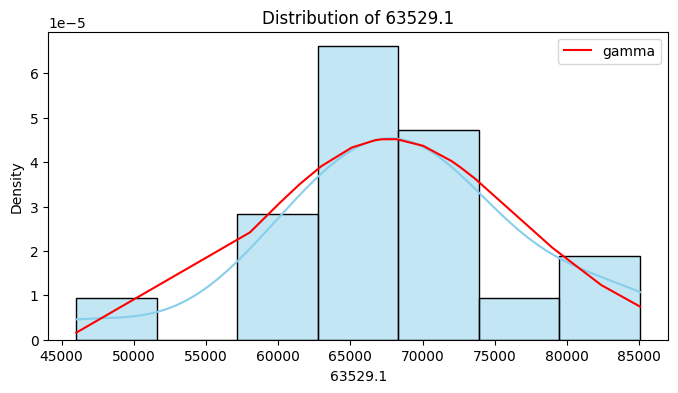

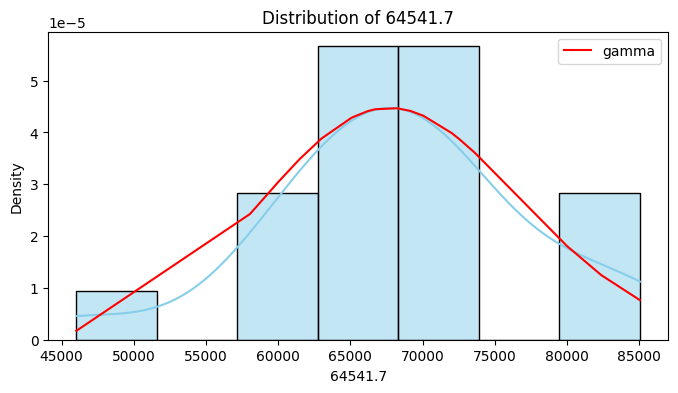

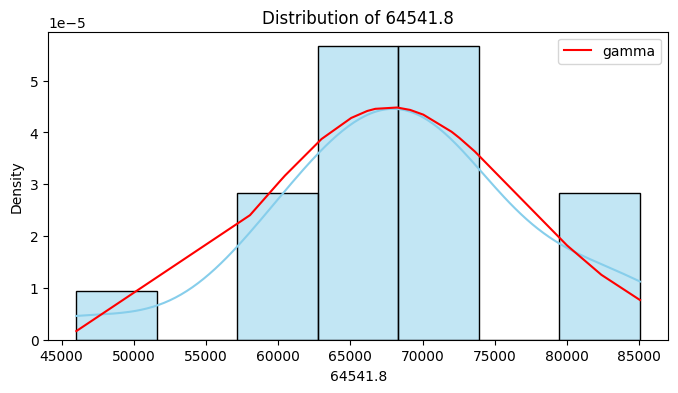

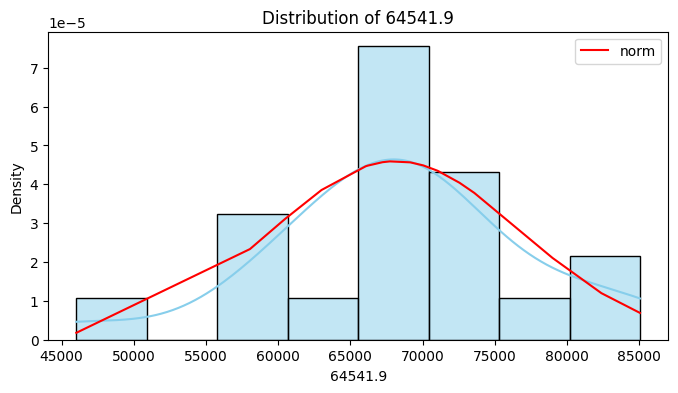

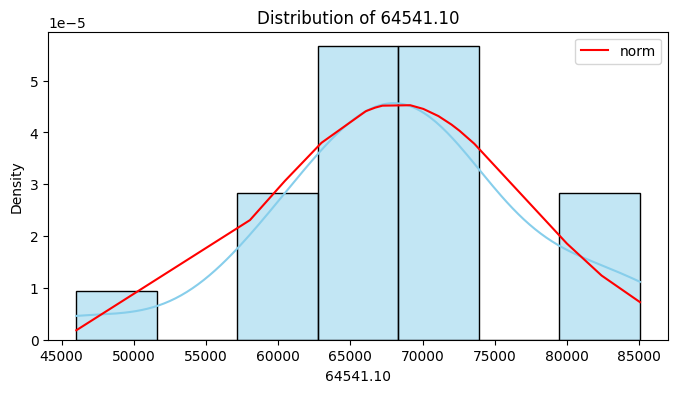

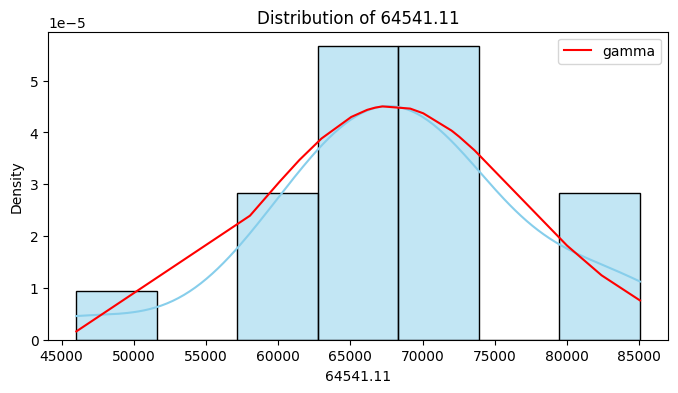

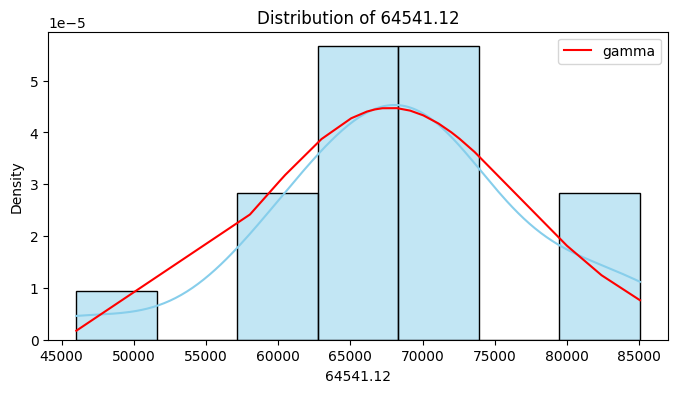

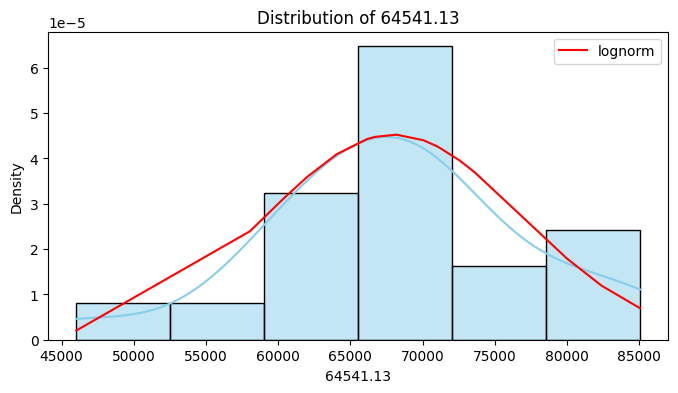

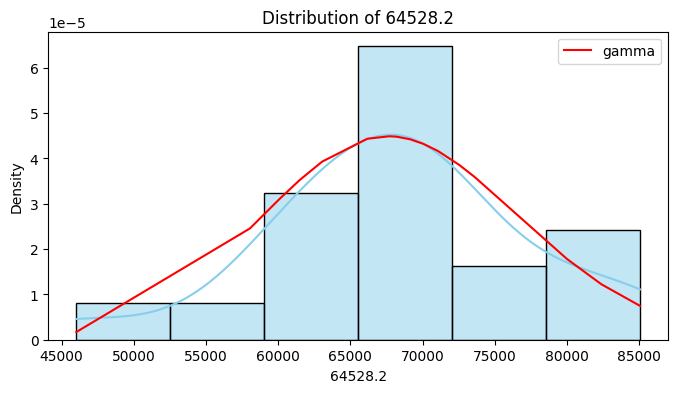

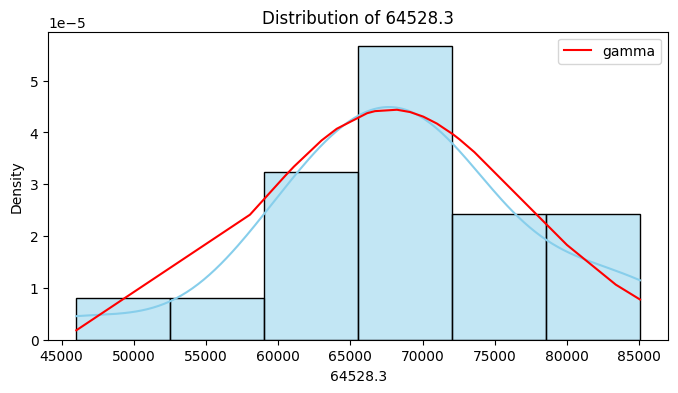

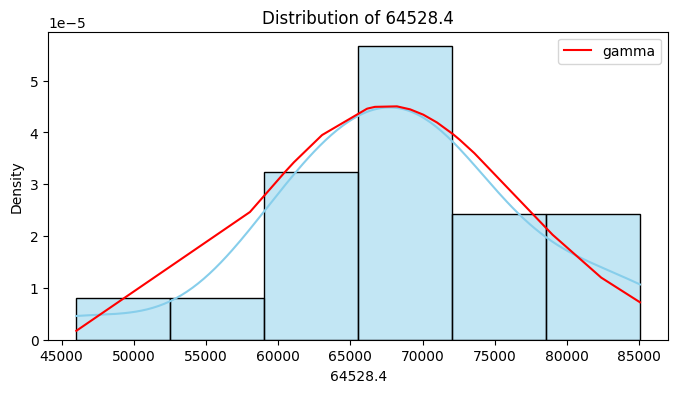

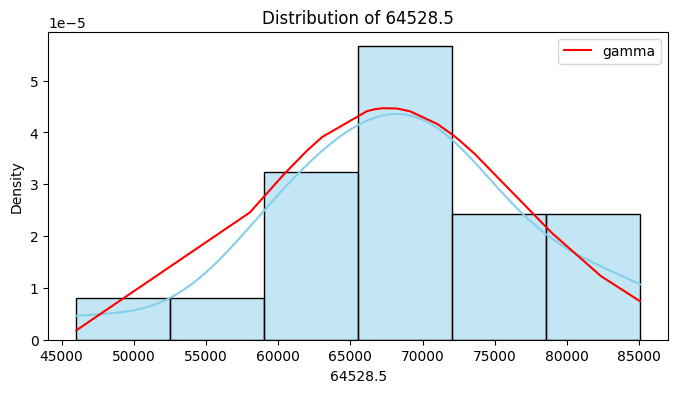

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load the dataset
file_path = "C:/Users/FREDDIE/Downloads/perfume+data/perfume_data.xlsx"
perfume_data = pd.read_excel(file_path)

# Exclude non-numeric columns
numeric_columns = perfume_data.select_dtypes(include=['number'])

# Plot histograms and probability density plots for each column
for column in numeric_columns.columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(perfume_data[column], kde=True, color='skyblue', stat='density')
    
    # Fit different distributions and find the best fit
    dist_names = ['norm', 'expon', 'gamma', 'lognorm']
    best_fit_name = None
    best_fit_params = None
    best_fit_score = float('inf')
    
    for dist_name in dist_names:
        dist = getattr(stats, dist_name)
        params = dist.fit(perfume_data[column].dropna())
        kstest_result = stats.kstest(perfume_data[column].dropna(), dist_name, params)
        if kstest_result.statistic < best_fit_score:
            best_fit_score = kstest_result.statistic
            best_fit_name = dist_name
            best_fit_params = params
    
    # Plot the best fit distribution
    x = sorted(perfume_data[column].dropna())
    y = getattr(stats, best_fit_name).pdf(x, *best_fit_params)
    plt.plot(x, y, label=best_fit_name, color='red')
    
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Density")
    plt.legend()
    plt.show()


We examine the distributions of each column from the results and compare them with the Kolmogorov-Smirnov test-determined best-fit probability distributions (gamma, lognormal, normal, and exponential). A non-parametric test called the KS test compares the data's empirical cumulative distribution function (or CDF) to the CDF of a reference distribution, which could be any of the following: lognormal, gamma, normal, or exponential. It determines the maximum difference between the two CDFs by computing a test statistic. A smaller test statistic indicates a better fit between the distribution and the data. We can determine which candidate distribution, in terms of this measure, best fits the observed data by running the KS test on each one.

3. Create a summary statistics.

In [20]:
# Generate summary statistics for numerical columns
summary_stats = perfume_data.describe()

# Print the summary statistics
print(summary_stats)


              64558         64556         64543       64543.1         64541  \
count     19.000000     19.000000     19.000000     19.000000     19.000000   
mean   68053.631579  68158.157895  68158.789474  68105.105263  68158.052632   
std     9060.134051   9080.814790   9034.516199   8976.919027   9068.234788   
min    46014.000000  46014.000000  46014.000000  46014.000000  46014.000000   
25%    63037.500000  63035.500000  63535.500000  63533.500000  63032.000000   
50%    68132.000000  68209.000000  68216.000000  68137.000000  68137.000000   
75%    71794.500000  72043.000000  71786.500000  71327.500000  71779.500000   
max    85056.000000  85056.000000  85056.000000  85056.000000  85056.000000   

            64543.2       64543.3       64541.1       64541.2       64541.3  \
count     19.000000     19.000000     19.000000     19.000000     19.000000   
mean   68263.000000  68213.473684  68107.578947  68160.000000  68106.842105   
std     8987.059914   9019.990123   9069.190012   9

4. Perform a hypothesis test (Code from scratch).
Establishing the null and alternative hypotheses, choosing an appropriate test statistic, figuring out the significance level, computing the p-value, and making a decision based on the p-value are the usual steps involved in conducting a hypothesis test.

In [21]:
from scipy import stats

# Define sample data (replace this with your actual data)
sample_data = [3, 5, 7, 9, 11, 13, 15, 17, 19, 21]

# Define the null hypothesis mean
null_mean = 10

# Select the significance level (alpha)
alpha = 0.05

# Calculate the t-test statistic and p-value
t_statistic, p_value = stats.ttest_1samp(sample_data, null_mean)

# Determine the critical value (two-tailed test)
critical_value = stats.t.ppf(1 - alpha / 2, df=len(sample_data) - 1)

# Make a decision
if p_value < alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

# Print the test statistic, p-value, and critical value
print("Test Statistic:", t_statistic)
print("P-Value:", p_value)
print("Critical Value:", critical_value)


Fail to reject the null hypothesis
Test Statistic: 1.044465935734187
P-Value: 0.3235109291662948
Critical Value: 2.2621571627409915


We reject the null hypothesis if the p-value is smaller than the significance level (alpha).
We are unable to reject the null hypothesis if the p-value is higher than or equal to the significance level. We come to the conclusion that there is enough evidence to support the alternative hypothesis if we reject the null hypothesis.
We lack sufficient evidence to draw the conclusion that the population mean differs significantly from the given value if we are unable to reject the null hypothesis.